In [ ]:
contents = {1:'data (prepare and load)',
            2: 'build model',
            3: 'fitting model to data (training)',
            4: 'making predictions and model eval (inference)',
            5: 'saving and loading model',
            6: 'putting it all together'
            }

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version

'2.1.0+cu118'

In [ ]:
#known params
weight = 0.7
bias = 0.3

#data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split data
train_split = int(0.8*len(X)) #80 percent training
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#visualize
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

#plots training data, test data and compares predictions

  plt.figure(figsize = (10,7))

  #training in blue, testing in green
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training Data')
  plt.scatter(test_data, test_labels, c= 'g', s = 4, label = 'Testing Data')

  if predictions is not None:
    #plot predictions in red
    plt.scatter(test_data, predictions, c= 'r', s =4, label = 'Predictions')

  #legend
  plt.legend(prop= {'size':14});

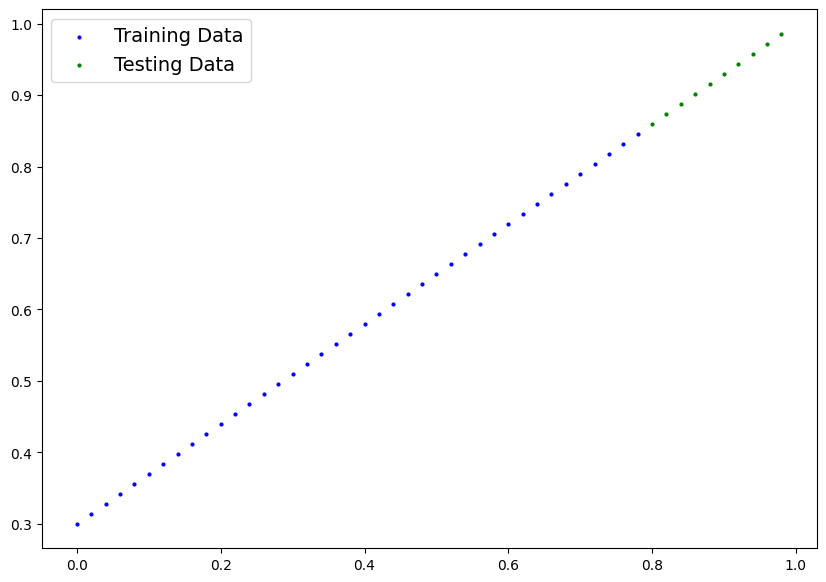

In [ ]:
plot_predictions();

In [ ]:
#lin reg model
class LinearRegressionModel(nn.Module):   #nn.Module are the building blocks
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,      #rand weights to start
                                            dtype = torch.float),    #pytorch wants float32
                                requires_grad = True)   #can update with grad desc

    self.bias = nn.Parameter(torch.randn(1,
                                         dtype = torch.float),
                             requires_grad = True)
  def forward(self, x: torch.Tensor) -> torch.Tensor:  #x is input data
      return self.weights*x + self.bias                 #lin reg formula


In [ ]:
"""
torch.nn
Contains all of the building blocks for computational graphs
(essentially a series of computations executed in a particular way).

torch.nn.Parameter
Stores tensors that can be used with nn.Module. If requires_grad=True gradients
(used for updating model parameters via gradient descent)
are calculated automatically, this is often referred to as "autograd".

torch.nn.Module
The base class for all neural network modules, all the building blocks for
neural networks are subclasses. If you're building a neural network in PyTorch, your
models should subclass nn.Module. Requires a forward() method be implemented.

torch.optim
Contains various optimization algorithms (these tell the model parameters stored in
nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

def forward()
All nn.Module subclasses require a forward() method, this defines the computation
that will take place on the data passed to the particular nn.Module
(e.g. the linear regression formula above).
"""

'\ntorch.nn\t\nContains all of the building blocks for computational graphs \n(essentially a series of computations executed in a particular way).\n\ntorch.nn.Parameter\t\nStores tensors that can be used with nn.Module. If requires_grad=True gradients \n(used for updating model parameters via gradient descent) \nare calculated automatically, this is often referred to as "autograd".\n\ntorch.nn.Module\t\nThe base class for all neural network modules, all the building blocks for\nneural networks are subclasses. If you\'re building a neural network in PyTorch, your\nmodels should subclass nn.Module. Requires a forward() method be implemented.\n\ntorch.optim\t\nContains various optimization algorithms (these tell the model parameters stored in \nnn.Parameter how to best change to improve gradient descent and in turn reduce the loss).\n\ndef forward()\t\nAll nn.Module subclasses require a forward() method, this defines the computation\nthat will take place on the data passed to the particul

In [ ]:
#simplified
"""
almost everything in a PyTorch neural network comes from torch.nn,

nn.Module contains the larger building blocks (layers)
nn.Parameter contains the smaller parameters like weights and biases
  (put these together to make nn.Module(s))
forward() tells the larger blocks how to make calculations on inputs
  (tensors full of data) within nn.Module(s)
torch.optim contains optimization methods on how to improve the parameters within
  nn.Parameter to better represent input data
"""

'\nalmost everything in a PyTorch neural network comes from torch.nn,\n\nnn.Module contains the larger building blocks (layers)\nnn.Parameter contains the smaller parameters like weights and biases \n  (put these together to make nn.Module(s))\nforward() tells the larger blocks how to make calculations on inputs \n  (tensors full of data) within nn.Module(s)\ntorch.optim contains optimization methods on how to improve the parameters within\n  nn.Parameter to better represent input data\n'

In [ ]:
#set seed. nn params are rand initialized
torch.manual_seed(42)

#create instance of model
model_0 = LinearRegressionModel()

#check the params in the module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#list names params (state of model)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)
#inference mode turns off things like grad tracking. only for predicting, not training

In [ ]:
print(f"Num of test samples: {len(X_test)}")
print(f"Num of predictions made: {len(y_preds)}")
print(f"predicted vals: \n{y_preds}")

Num of test samples: 10
Num of predictions made: 10
predicted vals: 
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


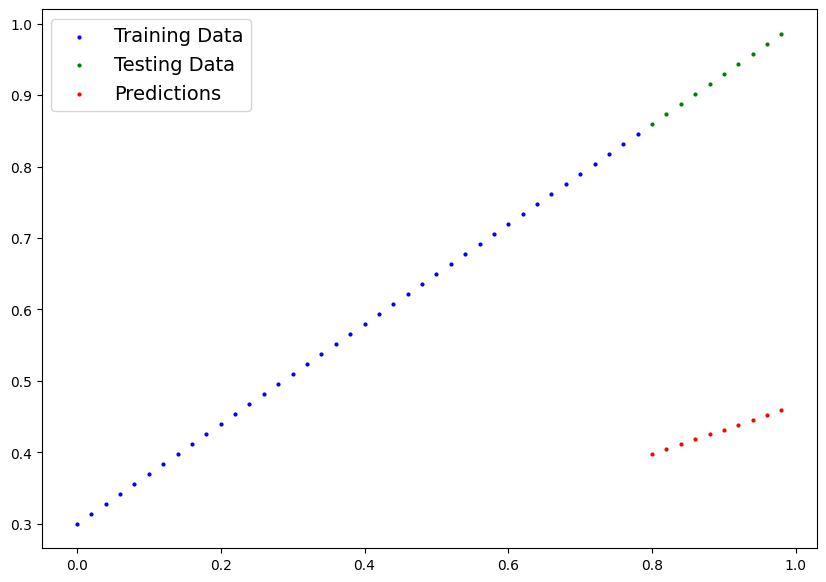

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
#check error
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [ ]:
"""
Common loss values (measure error):
Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()).
Binary cross entropy for binary classification problems (torch.nn.BCELoss()).

Common optimizers (how to update params to lower error):
Stochastic gradient descent (torch.optim.SGD()).
Adam optimizer (torch.optim.Adam()).
"""

'\nCommon loss values (measure error):\nMean absolute error (MAE) for regression problems (torch.nn.L1Loss()). \nBinary cross entropy for binary classification problems (torch.nn.BCELoss()).\n\nCommon optimizers (how to update params to lower error):\nStochastic gradient descent (torch.optim.SGD()). \nAdam optimizer (torch.optim.Adam()).\n'

In [ ]:
#loss func
loss_fn = nn.L1Loss() #same as MAE

#optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [ ]:
#training loop
"""
forward pass, calc loss, zero grads, backprop, update optimizer
"""

'\nforward pass, calc loss, zero grads, backprop, update optimizer\n'

In [ ]:
#testing loop
#forward pass, calc loss, calc eval metrics

In [ ]:
torch.manual_seed(42)

epochs = 200

#empty loss lists
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  #training mode
  model_0.train()     #default state of model
  y_pred = model_0(X_train) #forward pass using forward() method contained
  loss = loss_fn(y_pred, y_train)     #calc loss
  optimizer.zero_grad()     #zero grads of optimizer
  loss.backward()           #backprop
  optimizer.step()          #progress optimizer

  #testing
  model_0.eval()      #model in eval mode
  with torch.inference_mode():
    test_pred = model_0(X_test)     #forward pass on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float))    #preds are float, so compare within same type
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE Test Loss:

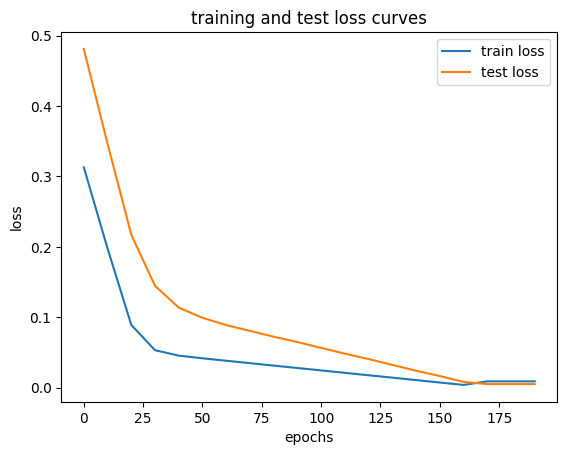

In [ ]:
#plot loss curves
plt.plot(epoch_count, train_loss_values, label = "train loss")
plt.plot(epoch_count, test_loss_values, label = "test loss")
plt.title("training and test loss curves")
plt.ylabel("loss")
plt.xlabel('epochs')
plt.legend();

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
#eval mode
model_0.eval()

#setup inference mode
with torch.inference_mode():
  #if we had been using multiple devices, check that calc is done on same device
  #model_0.to(device)
  #X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

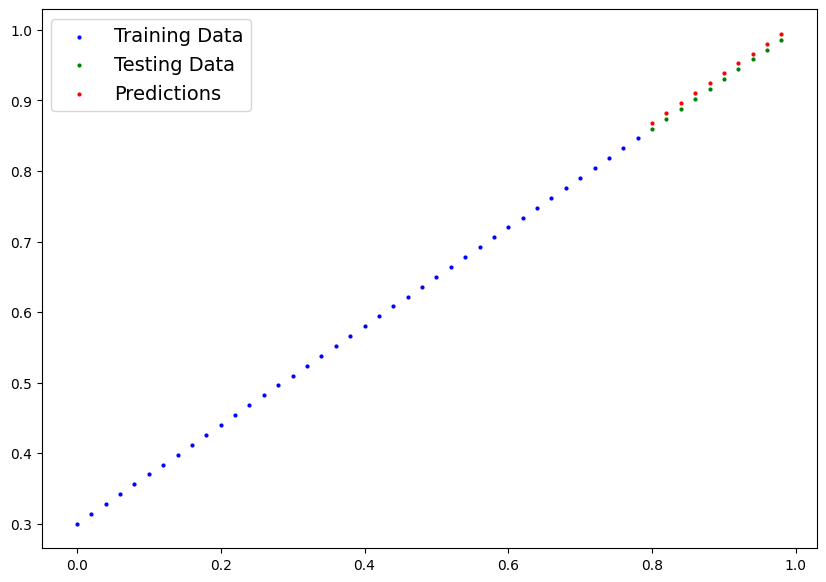

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
"""
torch.save	Saves a serialized object to disk using Python's pickle utility.

torch.load
Uses pickle's unpickling features to deserialize and load pickled Python object files into memory.
You can also set which device to load the object to (CPU, GPU etc).

torch.nn.Module.load_state_dict	Loads a model's parameter dictionary
(model.state_dict()) using a saved state_dict() object.
"""

"\ntorch.save\tSaves a serialized object to disk using Python's pickle utility.\n\ntorch.load\t\nUses pickle's unpickling features to deserialize and load pickled Python object files into memory. \nYou can also set which device to load the object to (CPU, GPU etc).\n\ntorch.nn.Module.load_state_dict\tLoads a model's parameter dictionary \n(model.state_dict()) using a saved state_dict() object.\n"

In [ ]:
from pathlib import Path

#create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#create model save path
MODEL_NAME = '01_pytorch_wkflw_model_0.pth'       #usually .pt or .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),        #only saves parameter vals
           f= MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_wkflw_model_0.pth


In [ ]:
!ls -l models/01_pytorch_wkflw_model_0.pth

-rw-r--r-- 1 root root 1662 Dec  7 22:48 models/01_pytorch_wkflw_model_0.pth


In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)


In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

In [ ]:
#device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"using device: {device}")

using device: cuda


In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1) #w/o unsq, errors occur with shapes later on
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(0.8*len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
#visualize
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

#plots training data, test data and compares predictions

  plt.figure(figsize = (10,7))

  #training in blue, testing in green
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training Data')
  plt.scatter(test_data, test_labels, c= 'g', s = 4, label = 'Testing Data')

  if predictions is not None:
    #plot predictions in red
    plt.scatter(test_data, predictions, c= 'r', s =4, label = 'Predictions')

  #legend
  plt.legend(prop= {'size':14});

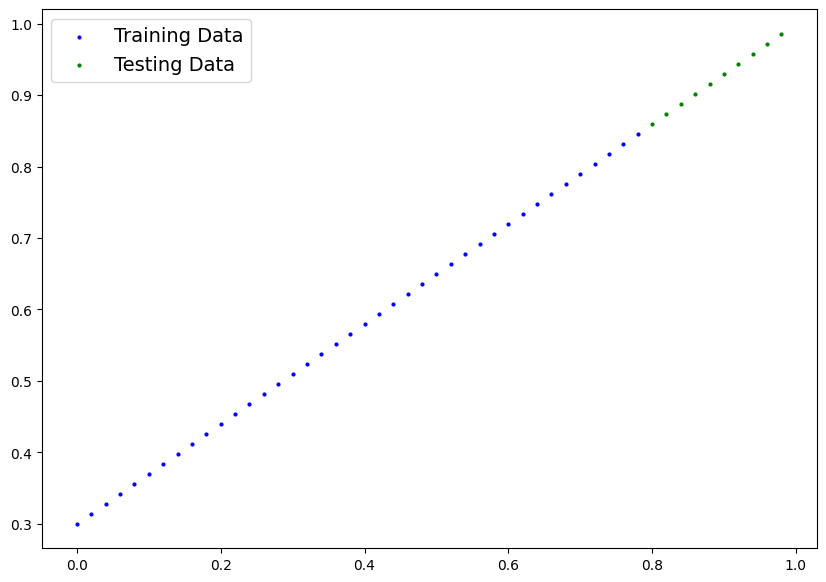

In [ ]:
plot_predictions()

In [ ]:
#subclass nn.Module to make model
class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for model params
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModelv2()
model_1, model_1.state_dict()

(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [ ]:
torch.manual_seed(42)
epochs = 1000
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"epoch: {epoch} | train loss: {loss} | test loss: {test_loss}")

epoch: 0 | train loss: 0.5551779866218567 | test loss: 0.5739762187004089
epoch: 100 | train loss: 0.006215683650225401 | test loss: 0.014086711220443249
epoch: 200 | train loss: 0.0012645035749301314 | test loss: 0.013801801018416882
epoch: 300 | train loss: 0.0012645035749301314 | test loss: 0.013801801018416882
epoch: 400 | train loss: 0.0012645035749301314 | test loss: 0.013801801018416882
epoch: 500 | train loss: 0.0012645035749301314 | test loss: 0.013801801018416882
epoch: 600 | train loss: 0.0012645035749301314 | test loss: 0.013801801018416882
epoch: 700 | train loss: 0.0012645035749301314 | test loss: 0.013801801018416882
epoch: 800 | train loss: 0.0012645035749301314 | test loss: 0.013801801018416882
epoch: 900 | train loss: 0.0012645035749301314 | test loss: 0.013801801018416882


In [ ]:
from pprint import pprint #pprint is pretty print
print(model_1.state_dict())
pprint(model_1.state_dict())
print(weight)
print(bias)

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])
0.7
0.3


In [ ]:
model_1.eval()
with torch.inference_mode():
  predictions = model_1(X_test)
predictions

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

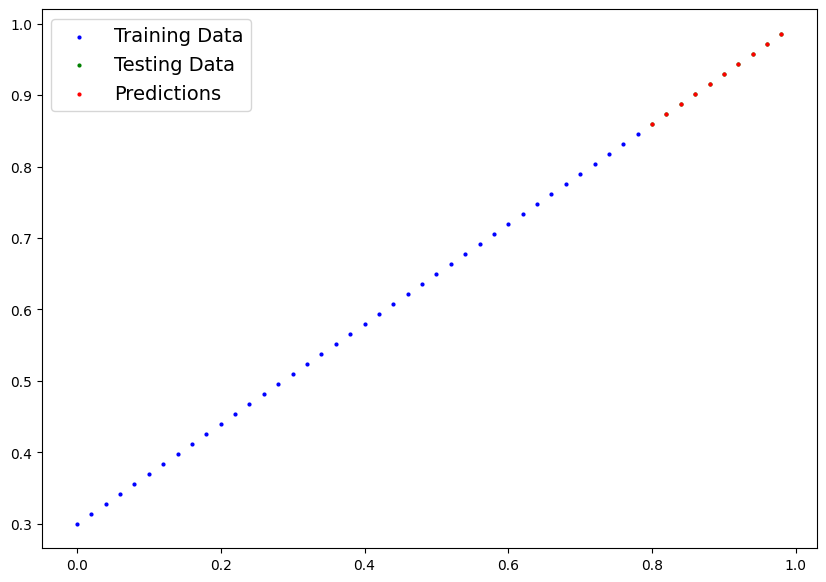

In [ ]:
#make sure data is back on cpu for use with pandas, matplotlib, numpy
plot_predictions(predictions = predictions.cpu())

In [ ]:
from pathlib import Path

MODEL_PATH = Path('Models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = '01_pytorch wkflw_model_1'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)


saving model to: Models/01_pytorch wkflw_model_1


In [ ]:
loaded_model_1 = LinearRegressionModelv2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_preds_1 = loaded_model_1(X_test)
predictions == loaded_preds_1

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')